# SPY Basic Analysis

This notebook demonstrates basic analysis of SPY (S&P 500 ETF) data.

## Overview
- Load SPY price data (daily, weekly, monthly frequencies)
- Basic data exploration and statistics
- Visualize price trends
- Calculate returns and performance metrics

**Data Source:** Local Parquet files managed by PriceManager

## 1. Import Required Libraries

In [ ]:
import os, sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set project root and change working directory
project_root = Path.cwd().parent.parent  # src/notebook/ is two levels below root
os.chdir(project_root)  # Change to project root so PriceManager can find data/
print(f"📁 Working directory: {os.getcwd()}")

# Add src directory to Python path
sys.path.insert(0, str(project_root / "src"))

from tiingo import TiingoClient
from core.config import Config
from market import PriceManager
from universe import SP500Universe

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

📁 Working directory: /Users/frank/Projects/QuantX/quantx-data-builder
✅ Libraries imported successfully


## 2. Initialize Components

In [ ]:
# Initialize configuration and components
config = Config("config/settings.yaml")
universe = SP500Universe()

# Initialize Tiingo client and PriceManager
tiingo = TiingoClient({
    'api_key': config.get('fetcher.tiingo.api_key'),
    'session': True
})

price_mgr = PriceManager(tiingo=tiingo, universe=universe)

print("✅ Components initialized successfully")

✅ Components initialized successfully


## 3. Load SPY Data - Daily Frequency

In [3]:
# Check if SPY data exists locally
spy_data_path = project_root / "data" / "curated" / "tickers" / "exchange=us" / "ticker=SPY" / "prices"

if not spy_data_path.exists():
    print("ℹ️ SPY data not found locally.")
    print("SPY path:", spy_data_path)
else:
    print("✅ SPY data already exists locally")
    print(f"📁 Path: {spy_data_path}")

✅ SPY data already exists locally
📁 Path: /Users/frank/Projects/QuantX/quantx-data-builder/data/curated/tickers/exchange=us/ticker=SPY/prices


In [4]:
# Load daily SPY data
spy_daily = price_mgr.load_price_data(
    symbol='SPY',
    frequency='daily',
    start_date=config.get('universe.sp500.start_date'),
    end_date=config.get('universe.sp500.end_date')
)

print(f"📊 Loaded {len(spy_daily):,} daily records for SPY")

# Debug: Check what columns we have
if len(spy_daily) > 0:
    print(f"Columns: {spy_daily.columns.tolist()}")
    if 'date' in spy_daily.columns:
        print(f"📅 Date range: {spy_daily['date'].min()} to {spy_daily['date'].max()}")
    print(f"\nFirst 5 rows:")
    display(spy_daily.head())
else:
    print("⚠️  No data returned. Check if SPY data exists in data/curated/tickers/")

📊 Loaded 2,984 daily records for SPY
Columns: ['gvkey', 'date', 'open', 'high', 'low', 'close', 'volume', 'adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume', 'div_cash', 'split_factor', 'exchange', 'currency', 'freq', 'year']
📅 Date range: 2014-01-02 to 2025-11-11

First 5 rows:


,gvkey,date,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume,div_cash,split_factor,exchange,currency,freq,year
2265,9929,2014-01-02,183.98,184.07,182.48,182.92,119636836,150.161865,150.235322,148.937586,149.296708,119636836,0.0,1.0,us,USD,daily,2014
2266,9929,2014-01-03,183.23,183.60,182.63,182.89,81390502,149.549726,149.851714,149.060014,149.272222,81390502,0.0,1.0,us,USD,daily,2014
2267,9929,2014-01-06,183.49,183.56,182.08,182.36,108028139,149.761934,149.819067,148.611112,148.839644,108028139,0.0,1.0,us,USD,daily,2014
2268,9929,2014-01-07,183.09,183.79,182.95,183.48,86144169,149.435460,150.006790,149.321194,149.753772,86144169,0.0,1.0,us,USD,daily,2014
2269,9929,2014-01-08,183.45,183.83,182.89,183.52,96582234,149.729286,150.039437,149.272222,149.786419,96582234,0.0,1.0,us,USD,daily,2014


## 4. Basic Statistics

In [5]:
# Calculate basic statistics for adjusted close prices
print("SPY Price Statistics (Adjusted Close)")
print("=" * 50)
print(f"Mean:           ${spy_daily['adj_close'].mean():.2f}")
print(f"Median:         ${spy_daily['adj_close'].median():.2f}")
print(f"Std Dev:        ${spy_daily['adj_close'].std():.2f}")
print(f"Min:            ${spy_daily['adj_close'].min():.2f}")
print(f"Max:            ${spy_daily['adj_close'].max():.2f}")
print(f"Current Price:  ${spy_daily['adj_close'].iloc[-1]:.2f}")

# Overall statistics
spy_daily[['adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume']].describe()

SPY Price Statistics (Adjusted Close)
Mean:           $319.77
Median:         $272.60
Std Dev:        $139.77
Min:            $142.16
Max:            $687.39
Current Price:  $683.00


,adj_open,adj_high,adj_low,adj_close,adj_volume
count,2984.000000,2984.000000,2984.000000,2984.000000,2.984000e+03
mean,319.710713,321.428152,317.831748,319.767730,8.806939e+07
std,139.739147,140.441927,138.937438,139.771953,4.484743e+07
min,142.652955,143.289580,141.779637,142.155082,2.027001e+07
25%,195.289929,195.872896,194.553308,195.244181,5.987593e+07
50%,272.277828,273.700277,270.953462,272.600846,7.668982e+07
75%,414.510682,416.667127,411.954145,414.524309,1.023296e+08
max,688.720000,689.700000,684.830000,687.390000,5.072443e+08


## 5. Visualize Price Movement

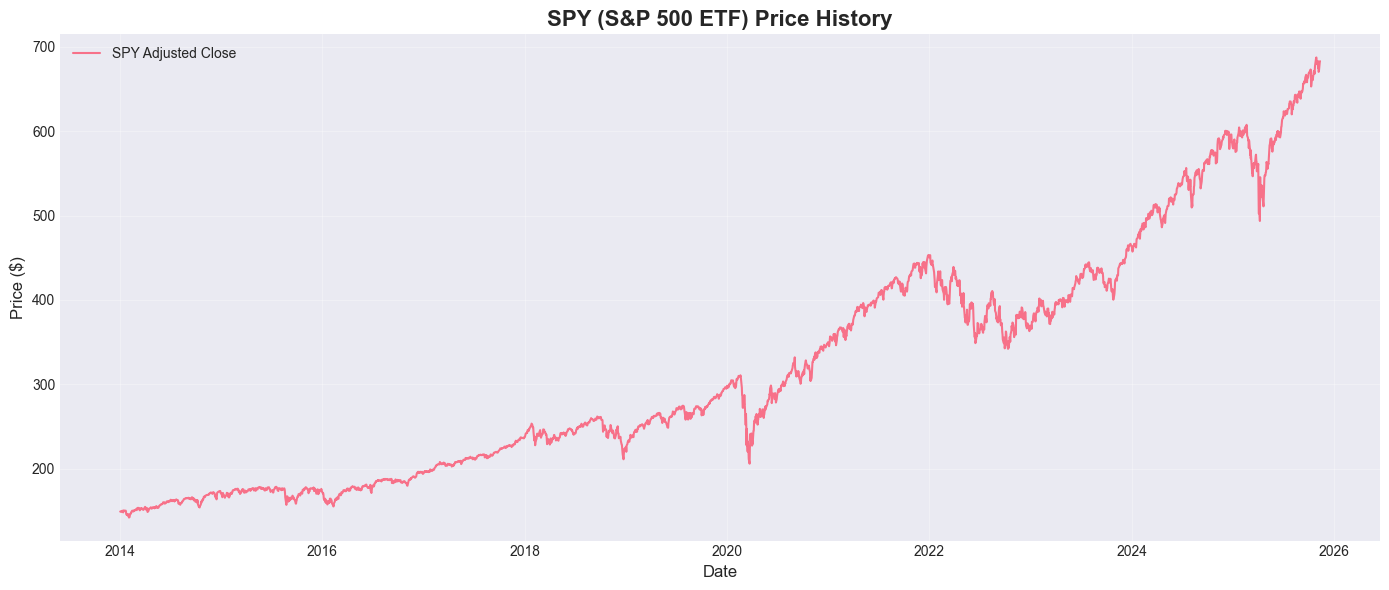

📈 Price change: $149.30 → $683.00


In [6]:
# Plot SPY closing price over time
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(spy_daily['date'], spy_daily['adj_close'], linewidth=1.5, label='SPY Adjusted Close')
ax.set_title('SPY (S&P 500 ETF) Price History', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print(f"📈 Price change: ${spy_daily['adj_close'].iloc[0]:.2f} → ${spy_daily['adj_close'].iloc[-1]:.2f}")

## 6. Calculate Returns

In [7]:
# Calculate daily returns
spy_daily['daily_return'] = spy_daily['adj_close'].pct_change()
spy_daily['cumulative_return'] = (1 + spy_daily['daily_return']).cumprod() - 1

# Display return statistics
print("Return Statistics")
print("=" * 50)
print(f"Average Daily Return:    {spy_daily['daily_return'].mean()*100:.4f}%")
print(f"Daily Return Std Dev:    {spy_daily['daily_return'].std()*100:.4f}%")
print(f"Total Return:            {spy_daily['cumulative_return'].iloc[-1]*100:.2f}%")
print(f"Annualized Return:       {((1 + spy_daily['cumulative_return'].iloc[-1])**(252/len(spy_daily)) - 1)*100:.2f}%")
print(f"Best Day:                {spy_daily['daily_return'].max()*100:.2f}%")
print(f"Worst Day:               {spy_daily['daily_return'].min()*100:.2f}%")

# Show recent returns
print(f"\nRecent 5-day returns:")
spy_daily[['date', 'adj_close', 'daily_return', 'cumulative_return']].tail()

Return Statistics
Average Daily Return:    0.0570%
Daily Return Std Dev:    1.0957%
Total Return:            357.48%
Annualized Return:       13.70%
Best Day:                10.50%
Worst Day:               -10.94%

Recent 5-day returns:


,date,adj_close,daily_return,cumulative_return
2979,2025-11-05,677.58,0.003465,3.538479
2980,2025-11-06,670.31,-0.010729,3.489784
2981,2025-11-07,670.97,0.000985,3.494205
2982,2025-11-10,681.44,0.015604,3.564334
2983,2025-11-11,683.00,0.002289,3.574783


## 7. Visualize Cumulative Returns

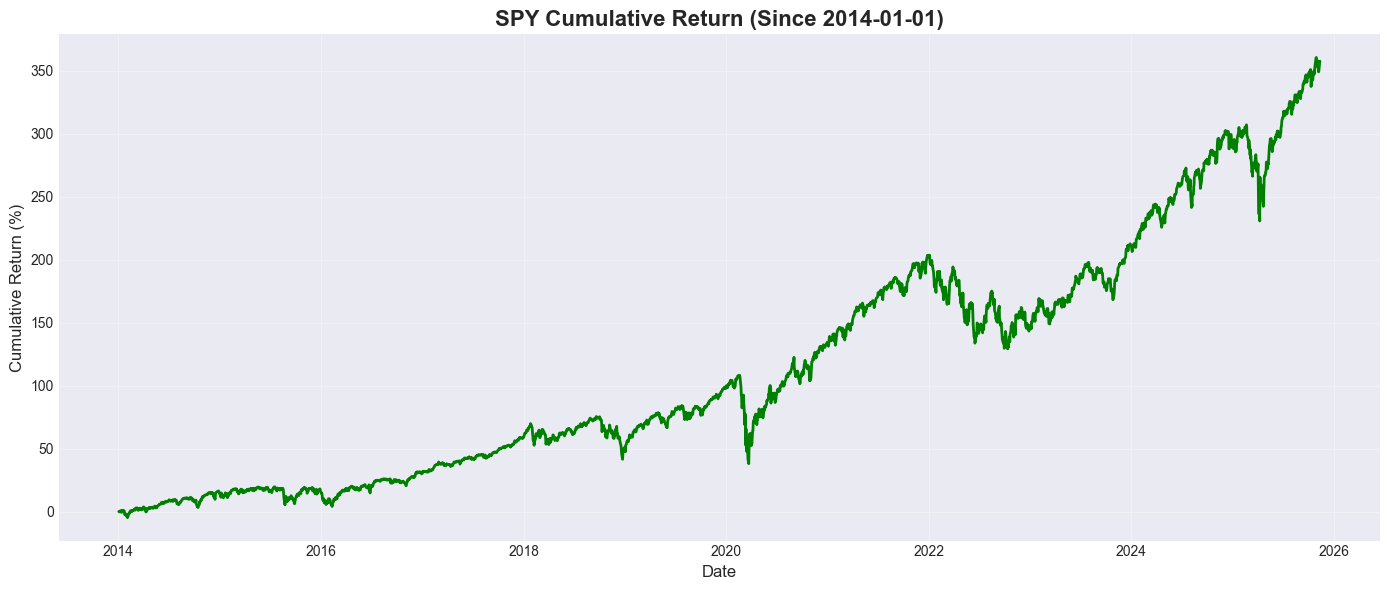

Total cumulative return: 357.48%


In [8]:
# Plot cumulative returns
plt.figure(figsize=(14, 6))
plt.plot(spy_daily['date'], spy_daily['cumulative_return'] * 100, linewidth=2, color='green')
plt.title('SPY Cumulative Return (Since 2014-01-01)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total cumulative return: {spy_daily['cumulative_return'].iloc[-1]*100:.2f}%")

## 8. Analyze Volume

Volume Statistics
Average Daily Volume:    88,069,392
Median Daily Volume:     76,689,816
Max Daily Volume:        507,244,300
Min Daily Volume:        20,270,007
Std Dev:                 44,847,425


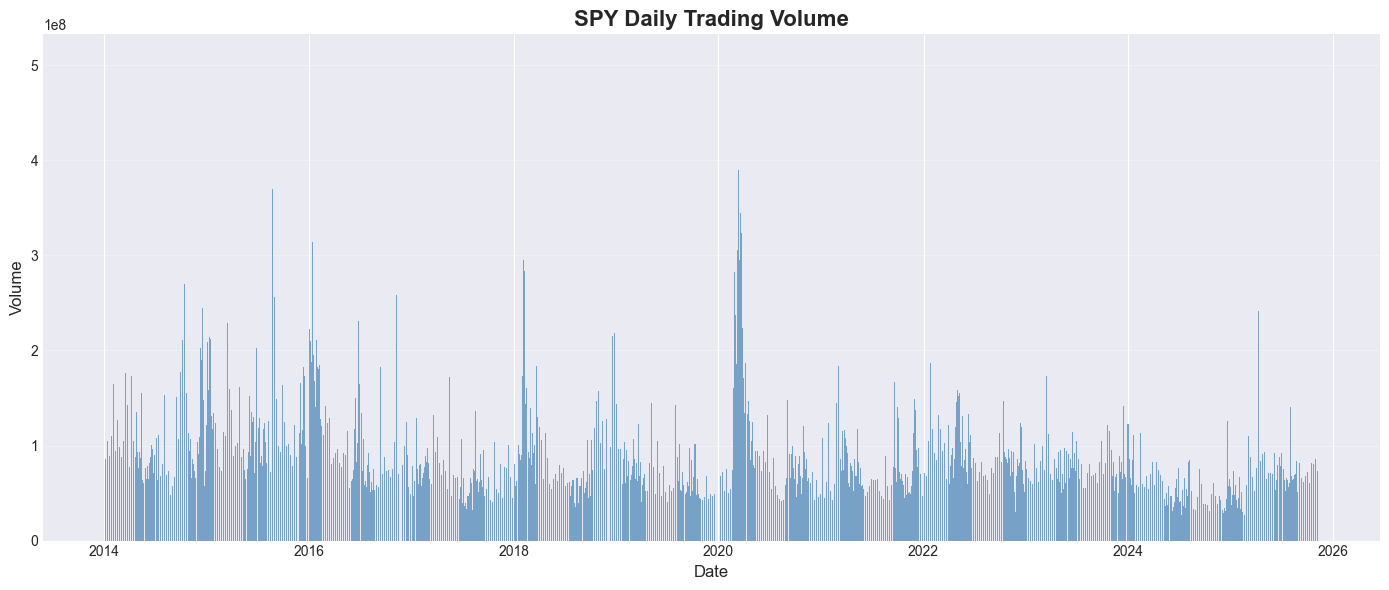

In [9]:
# Volume statistics
print("Volume Statistics")
print("=" * 50)
print(f"Average Daily Volume:    {spy_daily['volume'].mean():,.0f}")
print(f"Median Daily Volume:     {spy_daily['volume'].median():,.0f}")
print(f"Max Daily Volume:        {spy_daily['volume'].max():,.0f}")
print(f"Min Daily Volume:        {spy_daily['volume'].min():,.0f}")
print(f"Std Dev:                 {spy_daily['volume'].std():,.0f}")

# Plot volume over time
plt.figure(figsize=(14, 6))
plt.bar(spy_daily['date'], spy_daily['volume'], width=1, alpha=0.7, color='steelblue')
plt.title('SPY Daily Trading Volume', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 9. Load Multi-Frequency Data

In [10]:
# Load weekly and monthly data
print("Loading SPY data at multiple frequencies...")
spy_weekly = price_mgr.load_price_data(symbol='SPY', frequency='weekly')
spy_monthly = price_mgr.load_price_data(symbol='SPY', frequency='monthly')

print(f"\nDaily data:   {len(spy_daily)} records")
print(f"Weekly data:  {len(spy_weekly)} records")
print(f"Monthly data: {len(spy_monthly)} records")

print(f"\nDaily date range:   {spy_daily['date'].min()} to {spy_daily['date'].max()}")
print(f"Weekly date range:  {spy_weekly['date'].min()} to {spy_weekly['date'].max()}")
print(f"Monthly date range: {spy_monthly['date'].min()} to {spy_monthly['date'].max()}")

Loading SPY data at multiple frequencies...

Daily data:   2984 records
Weekly data:  620 records
Monthly data: 143 records

Daily date range:   2014-01-02 to 2025-11-11
Weekly date range:  2014-01-03 to 2025-11-14
Monthly date range: 2014-01-31 to 2025-11-28


## 10. Compare Frequencies

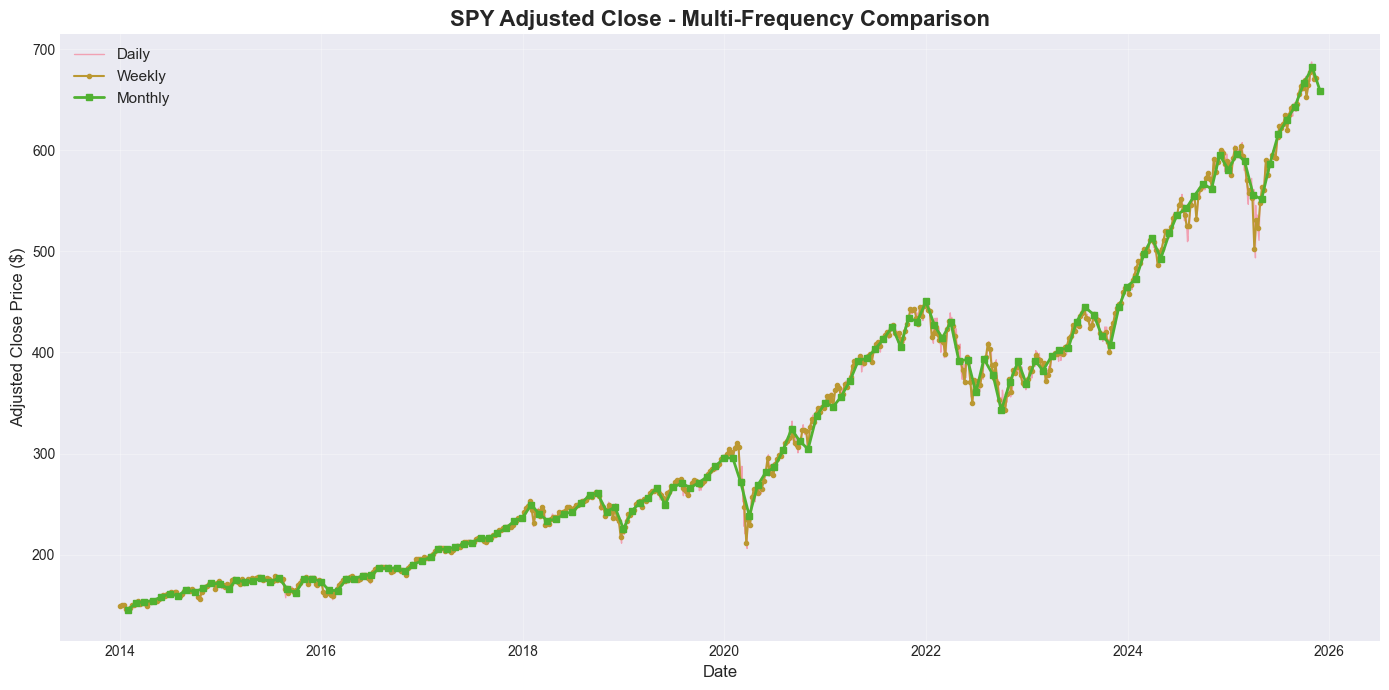


Return Comparison:
Daily avg return:   0.0570%   (std: 1.0957%)
Weekly avg return:  0.2695%   (std: 2.2803%)
Monthly avg return: 1.1581%   (std: 4.2106%)


In [11]:
# Plot all three frequencies together
plt.figure(figsize=(14, 7))
plt.plot(spy_daily['date'], spy_daily['adj_close'], label='Daily', alpha=0.6, linewidth=1)
plt.plot(spy_weekly['date'], spy_weekly['adj_close'], label='Weekly', marker='o', markersize=3, linewidth=1.5)
plt.plot(spy_monthly['date'], spy_monthly['adj_close'], label='Monthly', marker='s', markersize=4, linewidth=2)
plt.title('SPY Adjusted Close - Multi-Frequency Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate returns for each frequency
spy_weekly['return'] = spy_weekly['adj_close'].pct_change()
spy_monthly['return'] = spy_monthly['adj_close'].pct_change()

print("\nReturn Comparison:")
print("=" * 60)
print(f"Daily avg return:   {spy_daily['daily_return'].mean()*100:.4f}%   (std: {spy_daily['daily_return'].std()*100:.4f}%)")
print(f"Weekly avg return:  {spy_weekly['return'].mean()*100:.4f}%   (std: {spy_weekly['return'].std()*100:.4f}%)")
print(f"Monthly avg return: {spy_monthly['return'].mean()*100:.4f}%   (std: {spy_monthly['return'].std()*100:.4f}%)")

## 11. Summary

This notebook demonstrates the basic usage of the **quantx-data-builder** framework for loading and analyzing SPY (S&P 500 ETF) data. 

### Key Features Demonstrated:
- **Multi-frequency data loading**: Daily, weekly, and monthly data
- **Frequency-aware date alignment**: Automatic handling of different time granularities
- **Comprehensive analysis**: Price statistics, returns calculation, volume analysis
- **Data visualization**: Multiple chart types for price movement and cumulative returns
- **Parquet-based storage**: Efficient data storage and retrieval

### Framework Components Used:
- `Config`: Configuration management
- `UniverseBuilder`: Market universe definitions
- `TiingoClient`: Data fetcher integration
- `PriceManager`: Price data management with frequency support

### Next Steps:
- Explore other symbols and universes (e.g., S&P 500 constituents)
- Analyze ESG data using `ESGManager`
- Perform portfolio backtesting with multiple securities
- Use `check_missing_data` for data quality validation